In [1]:
import pandas as pd

import pyspark
from pyspark.sql import *
from pyspark.sql.avro.functions import from_avro, to_avro
from pyspark.sql.functions import *
from pyspark.sql.types import *

from matplotlib import pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
spark = SparkSession.builder.appName('Main').getOrCreate()

22/07/20 15:39:06 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
spark

In [4]:
column_names = ['Food', 'Not Food']
data = [('Apple', 'Ball'), ('Pizza', 'Car'), ('Cheeze', 'Sock'), ('Meat', 'Cat')]

In [5]:
rdd = spark.sparkContext.parallelize(data)
rdd_DF = rdd.toDF(column_names)

rdd_DF.printSchema()

root
 |-- Food: string (nullable = true)
 |-- Not Food: string (nullable = true)



In [6]:
rdd_DF.show()

+------+--------+
|  Food|Not Food|
+------+--------+
| Apple|    Ball|
| Pizza|     Car|
|Cheeze|    Sock|
|  Meat|     Cat|
+------+--------+



In [7]:
rdd_DF2 = spark.createDataFrame(rdd).toDF(*column_names)

In [8]:
rdd_DF2.show()

+------+--------+
|  Food|Not Food|
+------+--------+
| Apple|    Ball|
| Pizza|     Car|
|Cheeze|    Sock|
|  Meat|     Cat|
+------+--------+



In [9]:
schema = StructType([StructField('firstname', StringType(), True),
                    StructField('lastname', StringType(), True),
                    StructField('age', IntegerType(), True),
                    StructField('ID', IntegerType(), True),
                    StructField('Scalary', IntegerType(), True)])


data2 = [('Jhon', 'Bellisi', 40, 1, 100000),
          ('Igor', 'Berezkin', 20, 2, 90000), 
          ('Alice', 'Byti', 19, 3, 100000),
          ('Amir', 'Maslov', 23, 4, 200050)]

In [10]:
struct_DF = spark.createDataFrame(data= data2, schema= schema)
struct_DF.printSchema()


root
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Scalary: integer (nullable = true)



In [11]:
struct_DF.show()

+---------+--------+---+---+-------+
|firstname|lastname|age| ID|Scalary|
+---------+--------+---+---+-------+
|     Jhon| Bellisi| 40|  1| 100000|
|     Igor|Berezkin| 20|  2|  90000|
|    Alice|    Byti| 19|  3| 100000|
|     Amir|  Maslov| 23|  4| 200050|
+---------+--------+---+---+-------+



In [18]:
data3_csv = '/home/keidoom/IT/Docs/CSV_Files/practice/food.csv'

In [19]:
csv_DF = spark.read.csv(data3_csv, header=True)
csv_DF.show()

+--------------+--------------------+----------------+--------------------+
|     FOOD NAME|     SCIENTIFIC NAME|           GROUP|           SUB GROUP|
+--------------+--------------------+----------------+--------------------+
|      Angelica|    Angelica keiskei|Herbs and Spices|               Herbs|
| Savoy cabbage|Brassica oleracea...|      Vegetables|            Cabbages|
| Silver linden|      Tilia argentea|Herbs and Spices|               Herbs|
|          Kiwi| Actinidia chinensis|          Fruits|     Tropical fruits|
|Allium (Onion)|              Allium|      Vegetables|Onion-family vege...|
|  Garden onion|         Allium cepa|      Vegetables|Onion-family vege...|
|          Leek|       Allium porrum|      Vegetables|Onion-family vege...|
|        Garlic|      Allium sativum|Herbs and Spices|               Herbs|
|        Chives|Allium schoenoprasum|Herbs and Spices|               Herbs|
| Lemon verbena|   Aloysia triphylla|Herbs and Spices|               Herbs|
|    Cashew 

In [20]:
data4_parquet = '/home/keidoom/IT/Docs/PARQUET_Files/userdata.parquet'

In [21]:
parquet_DF = spark.read.parquet(data4_parquet, header= True)
parquet_DF.show()

+-------------------+---+----------+---------+--------------------+------+---------------+-------------------+--------------------+----------+---------+--------------------+--------------------+
|  registration_dttm| id|first_name|last_name|               email|gender|     ip_address|                 cc|             country| birthdate|   salary|               title|            comments|
+-------------------+---+----------+---------+--------------------+------+---------------+-------------------+--------------------+----------+---------+--------------------+--------------------+
|2016-02-03 10:55:29|  1|    Amanda|   Jordan|    ajordan0@com.com|Female|    1.197.201.2|   6759521864920116|           Indonesia|  3/8/1971| 49756.53|    Internal Auditor|               1E+02|
|2016-02-03 20:04:03|  2|    Albert|  Freeman|     afreeman1@is.gd|  Male| 218.111.175.34|                   |              Canada| 1/16/1968|150280.17|       Accountant IV|                    |
|2016-02-03 04:09:31|  3|

In [22]:
parquet_DF = parquet_DF.toPandas()

In [23]:
parquet_DF


,registration_dttm,id,first_name,last_name,email,gender,ip_address,cc,country,birthdate,salary,title,comments
0,2016-02-03 10:55:29,1,Amanda,Jordan,ajordan0@com.com,Female,1.197.201.2,6759521864920116,Indonesia,3/8/1971,49756.53,Internal Auditor,1E+02
1,2016-02-03 20:04:03,2,Albert,Freeman,afreeman1@is.gd,Male,218.111.175.34,,Canada,1/16/1968,150280.17,Accountant IV,
2,2016-02-03 04:09:31,3,Evelyn,Morgan,emorgan2@altervista.org,Female,7.161.136.94,6767119071901597,Russia,2/1/1960,144972.51,Structural Engineer,
3,2016-02-03 03:36:21,4,Denise,Riley,driley3@gmpg.org,Female,140.35.109.83,3576031598965625,China,4/8/1997,90263.05,Senior Cost Accountant,
4,2016-02-03 08:05:31,5,Carlos,Burns,cburns4@miitbeian.gov.cn,,169.113.235.40,5602256255204850,South Africa,,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2016-02-03 13:30:59,996,Dennis,Harris,dharrisrn@eepurl.com,Male,178.180.111.236,374288806662929,Greece,7/8/1965,263399.54,Editor,
996,2016-02-03 20:16:53,997,Gloria,Hamilton,ghamiltonro@rambler.ru,Female,71.50.39.137,,China,4/22/1975,83183.54,VP Product Management,
997,2016-02-03 08:02:20,998,Nancy,Morris,nmorrisrp@ask.com,,6.188.121.221,3553564071014997,Sweden,5/1/1979,NaN,Junior Executive,
998,2016-02-03 05:41:32,999,Annie,Daniels,adanielsrq@squidoo.com,Female,97.221.132.35,30424803513734,China,10/9/1991,18433.85,Editor,​


<AxesSubplot:>

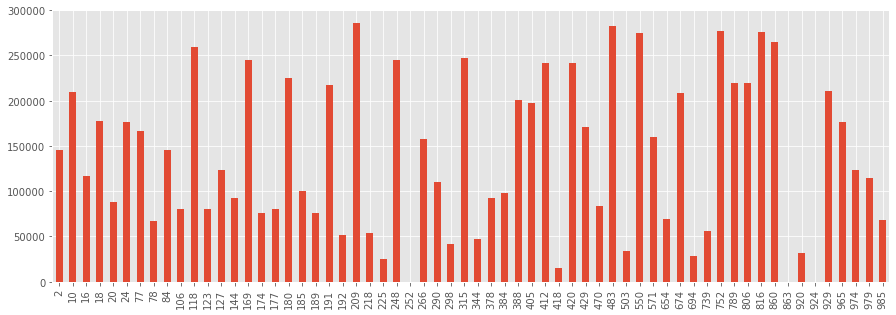

In [24]:
#for example
parquet_DF.loc[parquet_DF['country'] == 'Russia', 'salary'].plot.bar()
